In [12]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

In [23]:
data = pd.read_csv('../summary_data/TCRA_real.csv')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']
data = data[(data['Kmer Size'] >19)]
data.head()

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
0,0,bfc_SRR1543964_raw_21.corrected.fastq.gz,run.bfc.sh,21,4041,39832,2521,198,108,0,...,NaN,100,0.633644,0.986657,0.625075,0.999532,RSR,0.000000e+00,NaN,8544
2,2,bfc_SRR1543965_raw_26.corrected.fastq.gz,run.bfc.sh,26,2671,39991,3876,100,62,0,...,NaN,100,0.459250,0.986294,0.452868,0.999420,RSR,0.000000e+00,NaN,5399
6,6,bfc_SRR1543964_raw_20.corrected.fastq.gz,run.bfc.sh,20,2355,39832,4238,131,144,0,...,NaN,100,0.386542,0.970892,0.374953,0.999235,RSR,0.000000e+00,NaN,5325
7,7,bfc_SRR1543964_raw_23.corrected.fastq.gz,run.bfc.sh,23,4166,39833,2420,178,102,1,...,NaN,100,0.640039,0.987273,0.631788,0.999542,RSR,8.997173e-08,0.0,8642
8,8,bfc_SRR1543964_raw_22.corrected.fastq.gz,run.bfc.sh,22,2552,39833,4016,142,157,0,...,NaN,100,0.407643,0.970447,0.395229,0.999260,RSR,0.000000e+00,NaN,5617


In [24]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})
print (color_dict)

{'Bfc': 'purple', 'Bless': 'orange', 'Coral': 'brown', 'Fiona': 'gray', 'Lighter': 'pink', 'Musket': 'blue', 'Pollux': 'yellow', 'Racer': 'green', 'Reckoner': 'red', 'Sga': 'black'}


In [25]:
data = data[(data['Kmer Size'] ==20) | (data['Kmer Size'] ==22) | (data['Kmer Size'] ==24)| (data['Kmer Size'] ==26) 
           |  (data['Kmer Size'] ==28) |  (data['Kmer Size'] ==30)]

data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
2,2,bfc_SRR1543965_raw_26.corrected.fastq.gz,run.bfc.sh,26,2671,39991,3876,100,62,0,...,NaN,100,0.459250,0.986294,0.452868,0.999420,RSR,0.0,NaN,5399
6,6,bfc_SRR1543964_raw_20.corrected.fastq.gz,run.bfc.sh,20,2355,39832,4238,131,144,0,...,NaN,100,0.386542,0.970892,0.374953,0.999235,RSR,0.0,NaN,5325
8,8,bfc_SRR1543964_raw_22.corrected.fastq.gz,run.bfc.sh,22,2552,39833,4016,142,157,0,...,NaN,100,0.407643,0.970447,0.395229,0.999260,RSR,0.0,NaN,5617
9,9,bfc_SRR1543965_raw_28.corrected.fastq.gz,run.bfc.sh,28,2745,39954,3754,116,131,0,...,NaN,100,0.470944,0.972886,0.457819,0.999424,RSR,0.0,NaN,5606
11,11,bfc_SRR1543965_raw_20.corrected.fastq.gz,run.bfc.sh,20,2465,39991,4021,149,74,0,...,NaN,100,0.442934,0.983465,0.435487,0.999400,RSR,0.0,NaN,5201


No handles with labels found to put in legend.


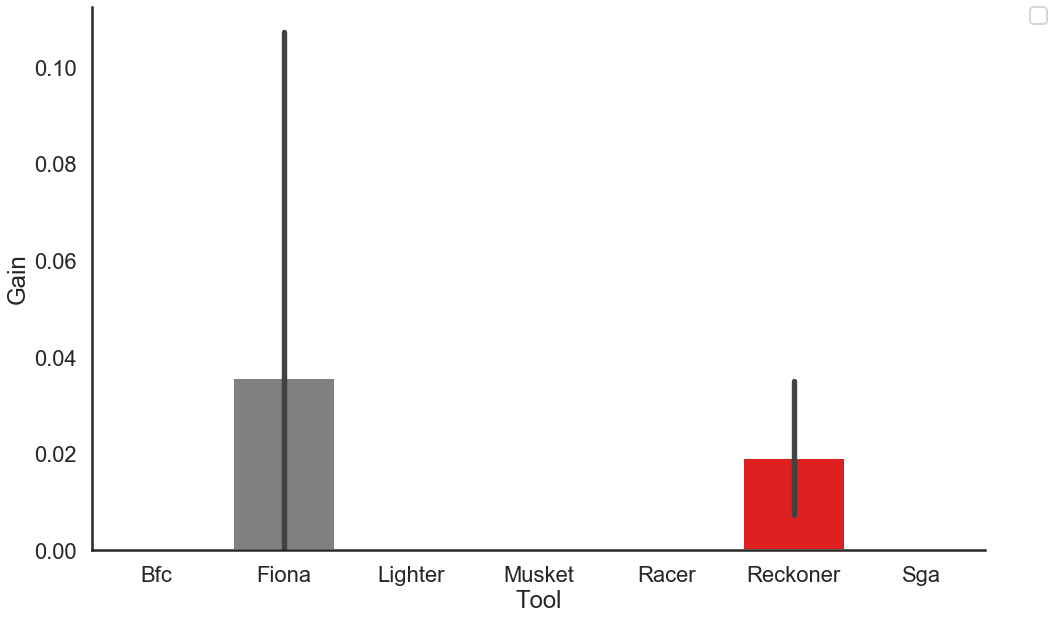

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Tool", y="Trim Effeciency",data = data[(data['Kmer Size'] ==28)], palette=color_dict)
g.set(ylabel='Gain')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov1.png", bbox_inches='tight')
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov1.pdf", bbox_inches='tight')

In [27]:
data2=data.groupby('Tool',as_index=False).mean()
data2=data2.fillna(0)
data2.head()

,Tool,Unnamed: 0,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,Total Trimmed Reads,...,Base - TP TRIM,Total Bases,Coverage,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Trim Percent,Trim Effeciency,total_corrections
0,Bfc,65.450000,24.000000,2569.700000,42293.625000,3095.475000,98.100000,239.600000,0.000000,0.000000,...,0.00,1.149457e+07,0.0,0.495232,0.951318,0.468258,0.999496,0.000000e+00,0.000000,5394.22500
1,Fiona,471.425000,24.000000,4385.750000,40336.250000,903.250000,150.500000,829.125000,1691.625000,3.250000,...,0.25,1.149650e+07,0.0,0.846379,0.507830,0.011924,0.999071,3.067668e-07,0.035714,14008.62500
2,Lighter,553.051282,23.948718,2333.025641,42060.179487,3351.102564,6.717949,226.717949,0.051282,0.025641,...,0.00,1.141872e+07,0.0,0.528524,0.941794,0.495770,0.999530,2.306968e-09,0.000000,5782.74359
3,Musket,658.000000,24.000000,0.000000,42443.250000,5853.250000,0.000000,0.000000,0.000000,0.000000,...,0.00,1.149457e+07,0.0,0.000000,0.000000,0.000000,0.999070,0.000000e+00,0.000000,0.00000
4,Racer,774.925000,24.000000,4828.125000,41819.125000,730.250000,0.500000,285.500000,633.000000,86.500000,...,0.00,1.150022e+07,0.0,0.888866,0.254255,-1.832960,0.997369,6.277071e-05,0.000000,26919.37500


No handles with labels found to put in legend.


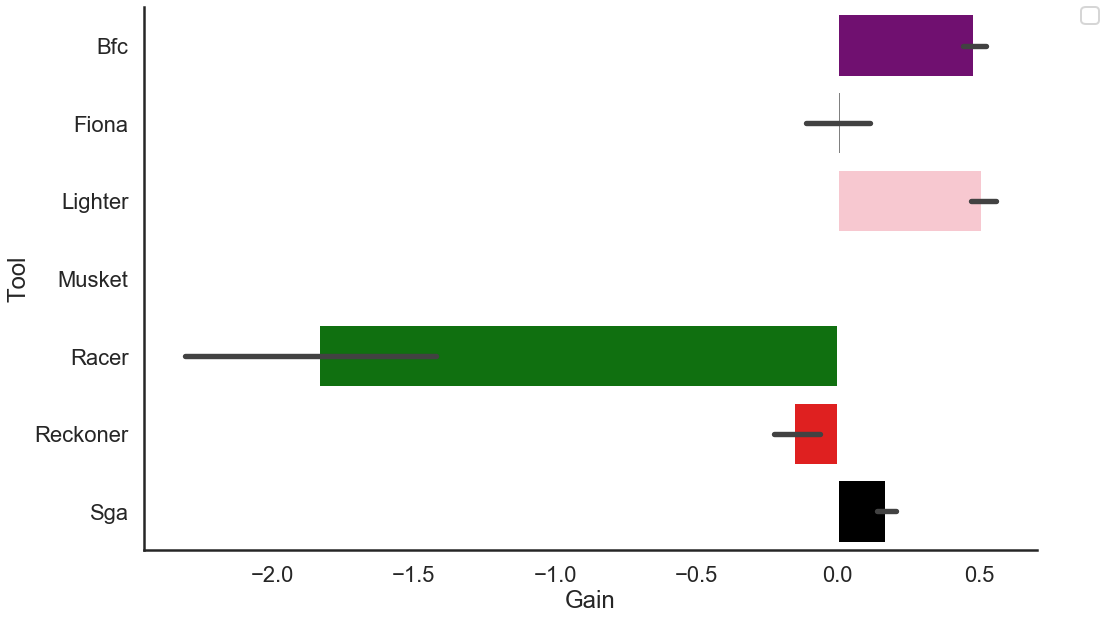

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(y="Tool", x="Base Gain",data = data[(data['Kmer Size'] ==28)], palette=color_dict)
g.set(xlabel='Gain', ylabel='Tool')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov1.png", bbox_inches='tight')
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov1.pdf", bbox_inches='tight')

In [29]:
print(data2.columns)

Index(['Tool', 'Unnamed: 0', 'Kmer Size', 'Read - TP', 'Read - TN',
       'Read - FN', 'Read - FN WRONG', 'Read - FP', 'Read - FP INDEL',
       'Total Trimmed Reads', 'Total Reads', 'Base - TP', 'Base - TN',
       'Base - FN', 'Base - FN WRONG', 'Base - FP', 'Base - FP INDEL',
       'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases', 'Coverage',
       'Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy',
       'Trim Percent', 'Trim Effeciency', 'total_corrections'],
      dtype='object')


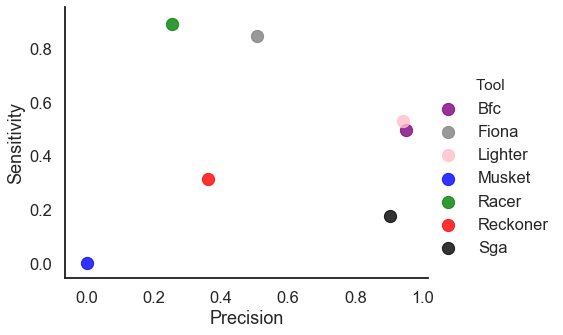

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data2 , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
#plt.ylim(-0.1, 1.1)
#plt.xlim(-0.1, 1.1)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.pdf")

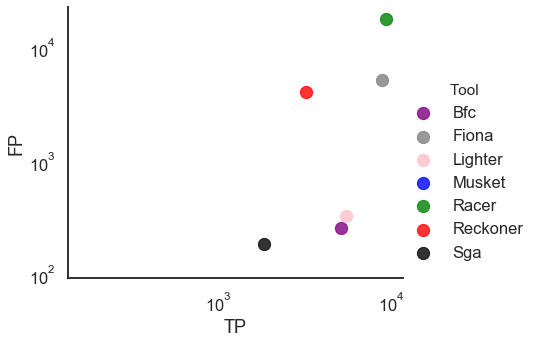

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data2 , x='Base - TP', y='Base - FP', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='TP', ylabel='FP')
#plt.title(str(th)+"bp")
g.set(xscale="log")
g.set(yscale="log")

#plt.ylim(-0.1, 1.1)
#plt.xlim(-0.1, 1.1)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.pdf")

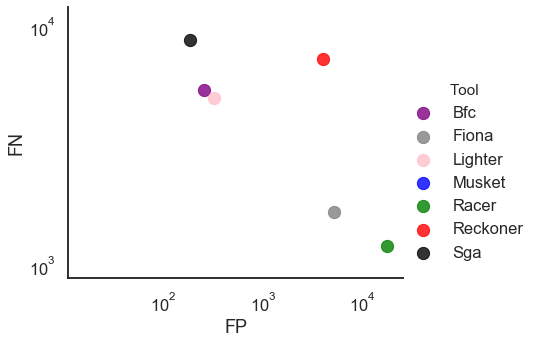

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data2 , x='Base - FP', y='Base - FN', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='FP', ylabel='FN')
#plt.title(str(th)+"bp")
g.set(xscale="log")
g.set(yscale="log")

#plt.ylim(-0.1, 1.1)
#plt.xlim(-0.1, 1.1)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_FN_vs_FP_cov32.png")
plt.savefig("../figures/WGS_human//lmplot_FN_vs_FP_cov32.pdf")